In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [39]:
df = pd.read_excel('New York.xlsx')
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('Date', inplace = True)
df.drop(columns = ['year', 'month'], inplace= True)
df_Price = df.drop(columns=['stateDescription', 'sectorName', 'customers', 'revenue', 'sales'])

In [40]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = df_Price.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([14.9329605, 14.9329605, 14.9329605], dtype=float32)}

In [41]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [42]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

In [43]:
Y_pred_df

,mean_forecast
2024-01-01,14.932961
2024-02-01,14.932961
2024-03-01,14.932961


In [44]:
pd.concat([df_Price, Y_pred_df])

,price,mean_forecast
2001-01-01,11.53,NaN
2001-02-01,11.17,NaN
2001-03-01,11.01,NaN
2001-04-01,10.70,NaN
2001-05-01,10.97,NaN
...,...,...
2023-12-01,17.79,NaN
2024-01-01,18.88,NaN
2024-01-01,NaN,14.932961
2024-02-01,NaN,14.932961


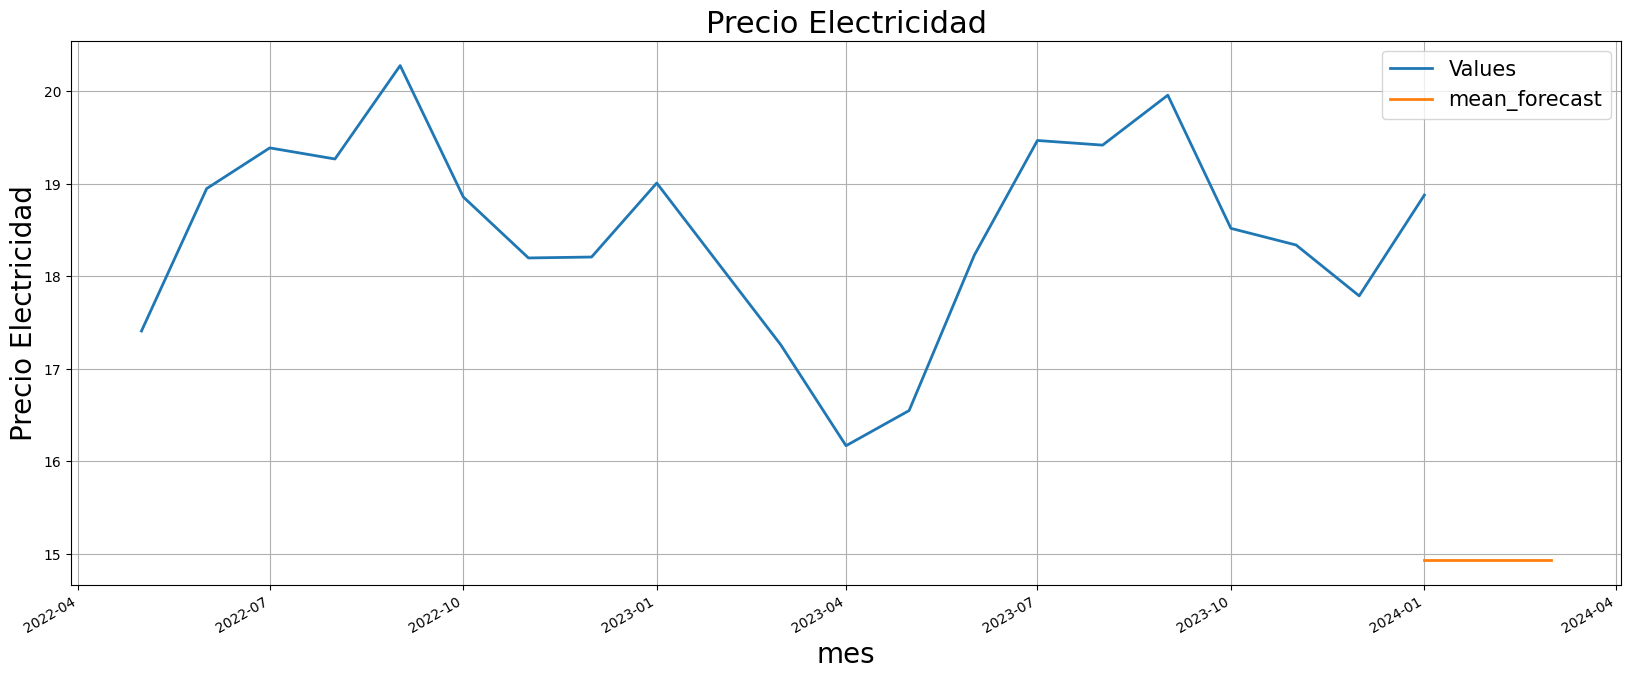

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:][['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

No es el mejor modelo para hacer un pronostico 

In [46]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=df_Price.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18.88, 18.88, 18.88], dtype=float32)}

In [47]:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [48]:
Y_pred_df

,mean_forecast,naive_forecast
2024-01-01,14.932961,18.879999
2024-02-01,14.932961,18.879999
2024-03-01,14.932961,18.879999


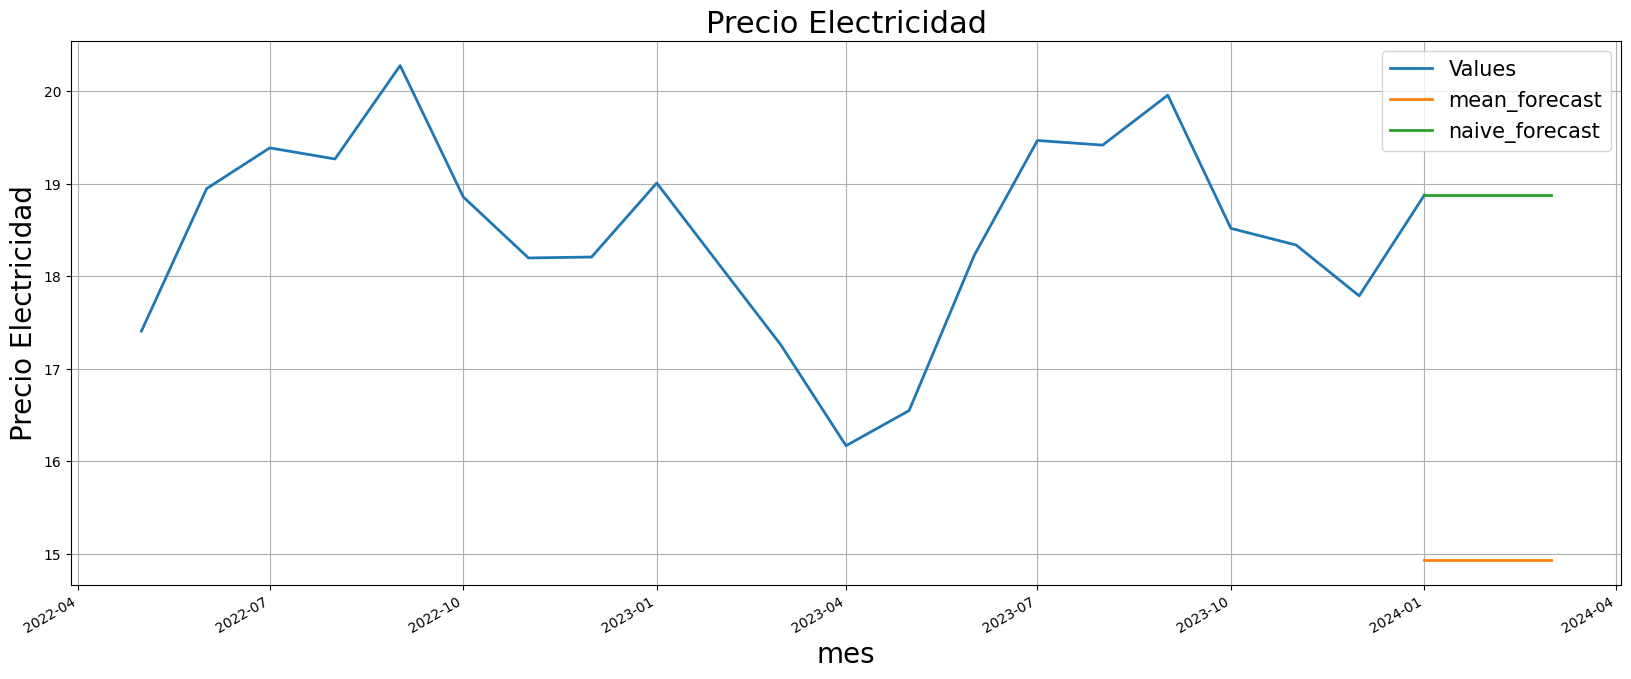

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

Vemos que este parece ajustarce mejor que la media 

In [50]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=df_Price.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18.09, 17.26, 16.17], dtype=float32)}

In [51]:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

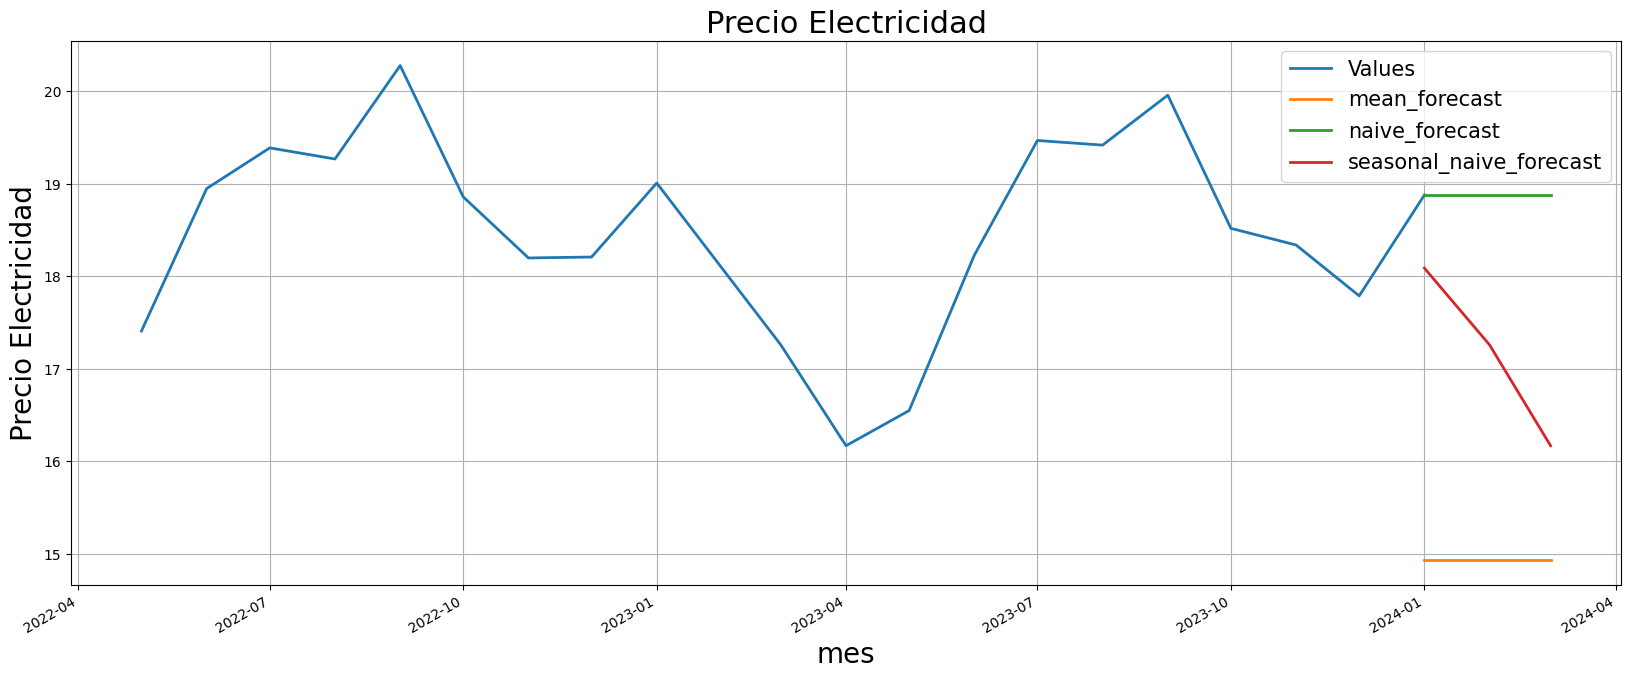

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

Creo que seria la mejor opcion ya que hay mucha estacionalidad en la serie de tiempo 

In [53]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=df_Price.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18.90663, 18.93326, 18.95989], dtype=float32)}

In [54]:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

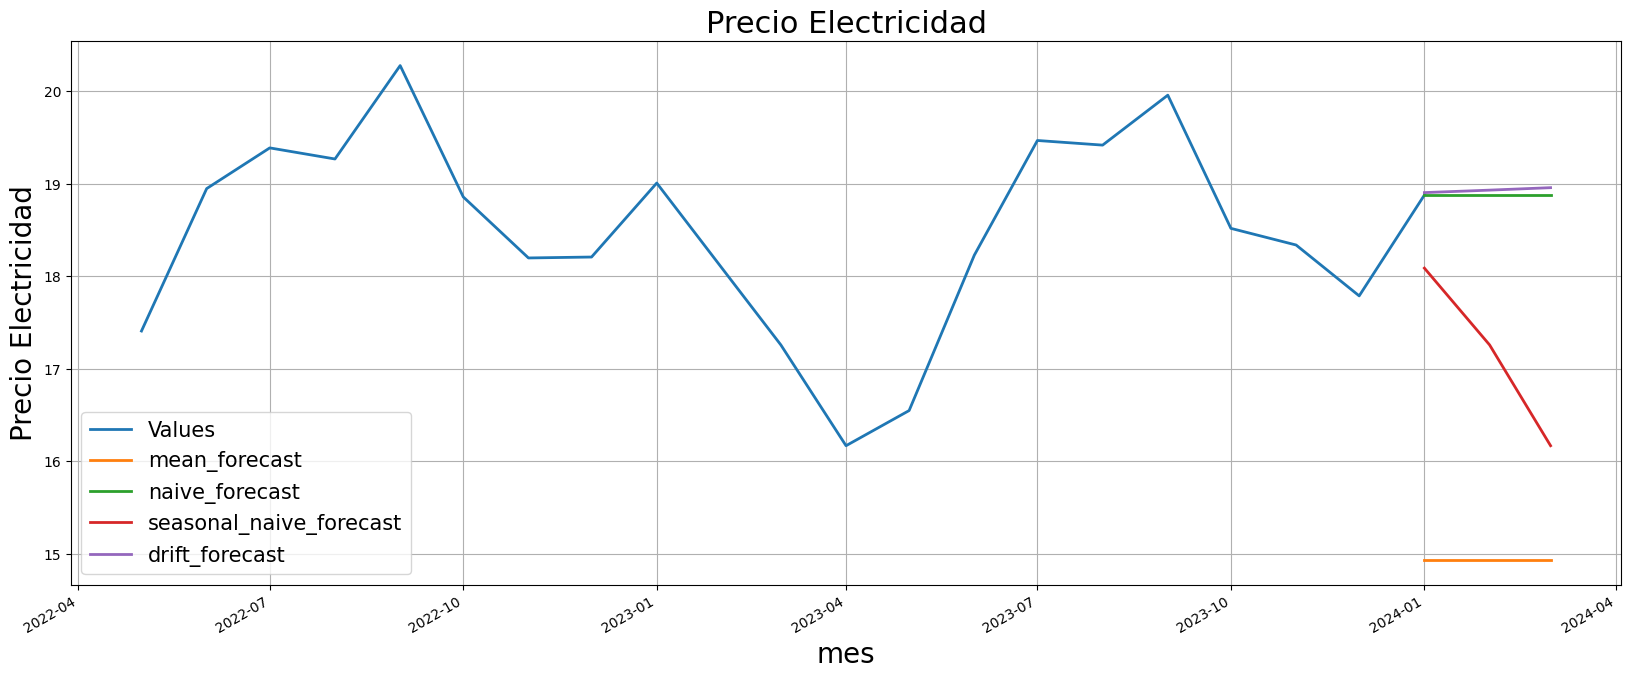

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
     

Vemos que no hay mucha tendenciia por lo que el drift se parece mucho al naive

# ***Residuales***

In [60]:
from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage

In [64]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [65]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=df_Price.values.reshape(-1,))
mean = model.predict(h=12)

In [67]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",df_Price.index,df_Price.values.reshape(-1,))

In [68]:
augment_df

,model,time_var,obs_values,fitted_values,residuals
0,Mean,2001-01-01,11.53,NaN,NaN
1,Mean,2001-02-01,11.17,NaN,NaN
2,Mean,2001-03-01,11.01,NaN,NaN
3,Mean,2001-04-01,10.70,NaN,NaN
4,Mean,2001-05-01,10.97,NaN,NaN
...,...,...,...,...,...
272,Mean,2023-09-01,19.96,20.280001,-0.320001
273,Mean,2023-10-01,18.52,18.860001,-0.340001
274,Mean,2023-11-01,18.34,18.200001,0.139999
275,Mean,2023-12-01,17.79,18.209999,-0.419999


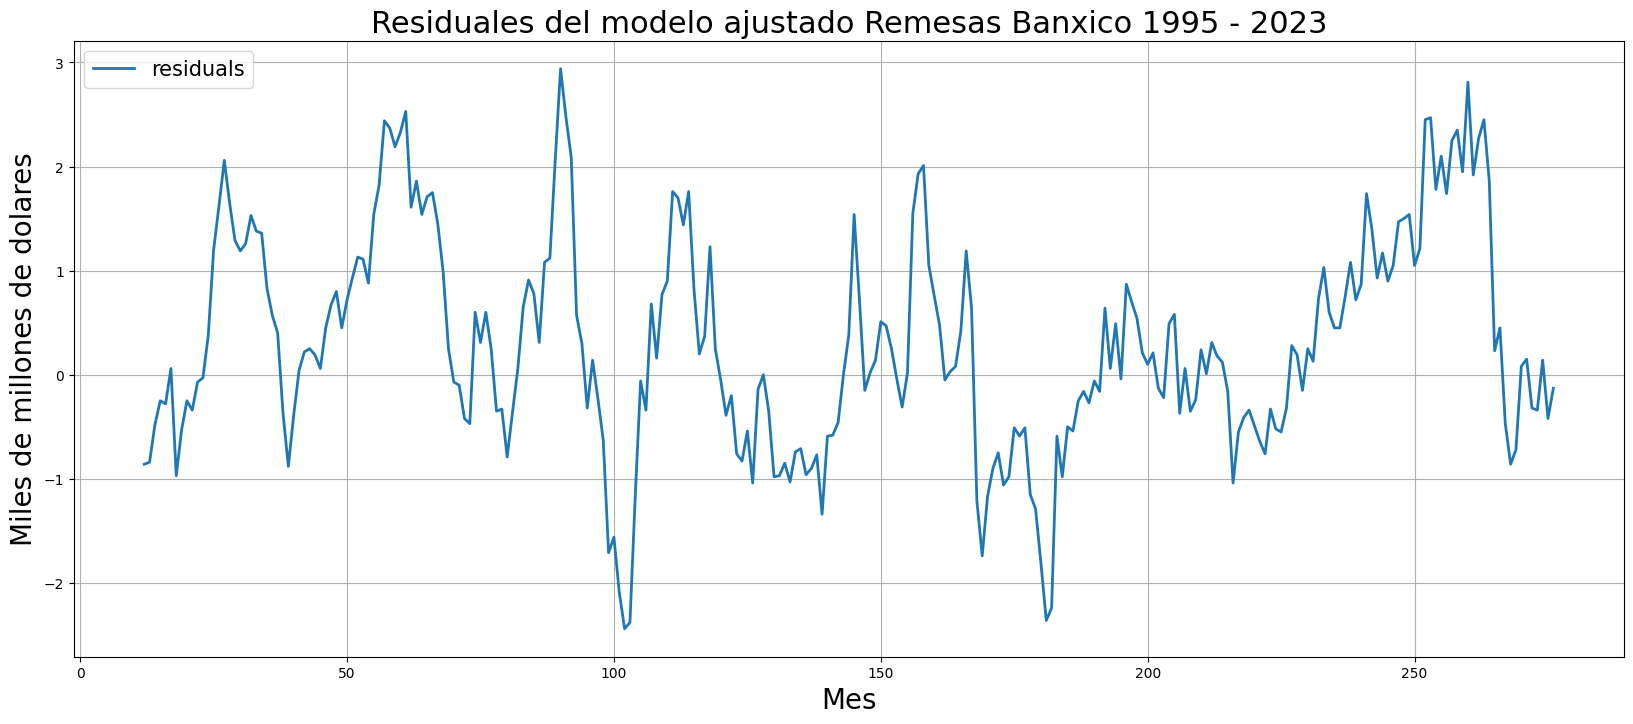

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado Remesas Banxico 1995 - 2023', fontsize=22)
ax.set_ylabel('Miles de millones de dolares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

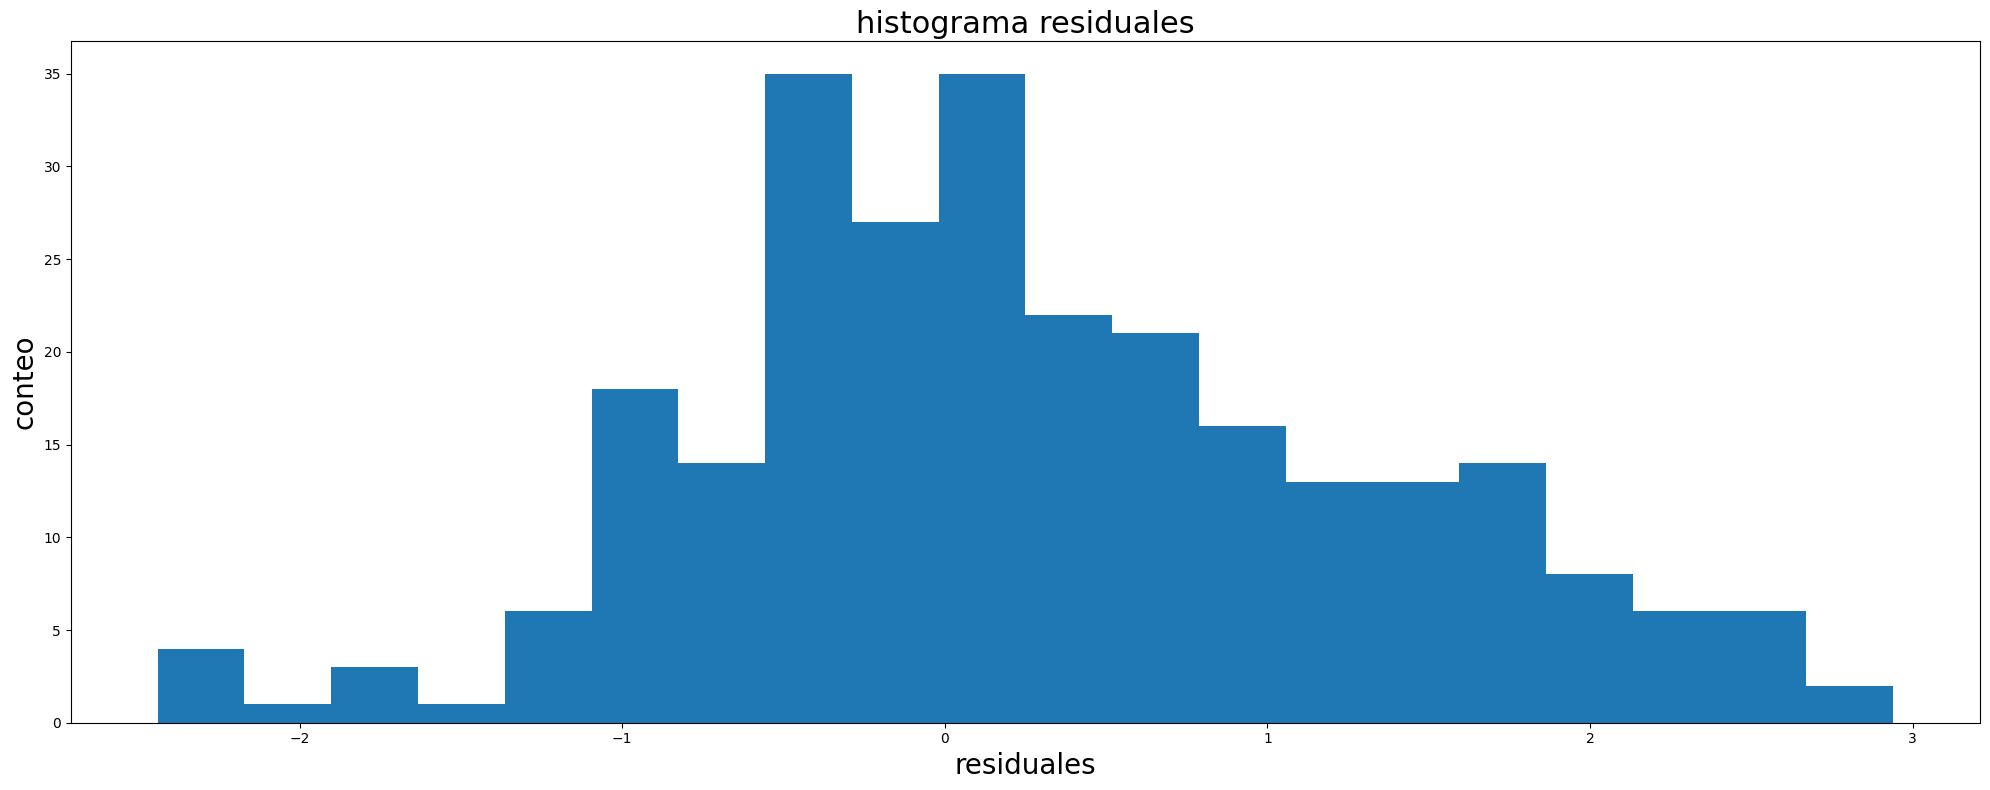

In [70]:
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Vemos como tenemos un sesgo derecho

Text(0, 0.5, 'ACF')

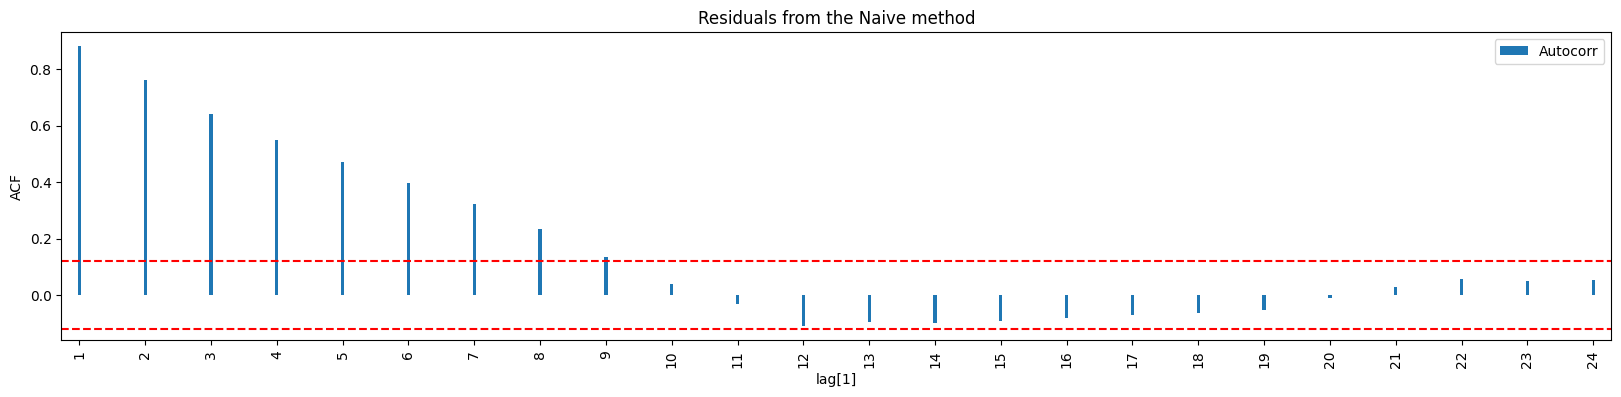

In [71]:
import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [72]:
import statsmodels

In [73]:
ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,66.931695,1.195627e-09


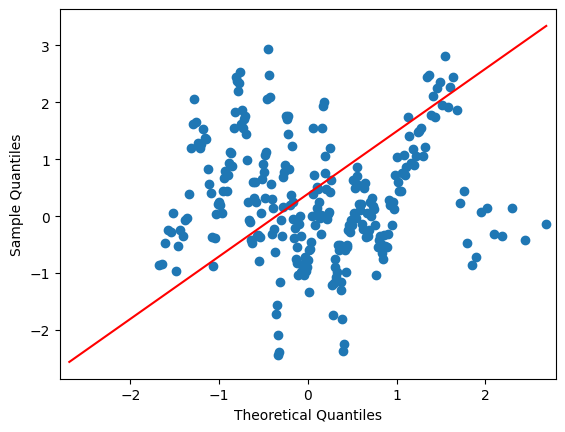

In [74]:
fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()